In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sbn

pd.set_option('display.max_columns', None)

In [2]:
info = pd.read_csv('../data/raw/instinfo_beta.txt', sep='\t')
info = info[lambda x: (x.pert_type.isin(['trt_cp', 'trt_sh', 'trt_xpr', 'trt_oe'])) | (x.pert_type.str.contains('ctl'))]
info.head()

C:\Users\natha\miniconda3\envs\gcnvae\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,cell_mfc_name,pert_mfc_id,det_plate,det_well,rna_plate,rna_well,count_mean,count_cv,qc_f_logp,qc_iqr,qc_slope,pert_id,sample_id,pert_type,cell_iname,qc_pass,dyn_range,inv_level_10,build_name,failure_mode,project_code,cmap_name
0,b11,NaN,20.00,uL,20 uL,72.0,72 h,h,VCAP,ERG_11,ERG013_VCAP_72H_X3_B11,O14,ERG013_VCAP_72H_X3,O14,59,18,7.3,11.74,66,ERG_11,ERG013_VCAP_72H_X3_B11:O14,trt_sh,VCAP,0.0,4.20788,4220.5,NaN,dyn_range,ERG,ERG
1,b10,NaN,1.00,uL,1 uL,96.0,96 h,h,U2OS,TRCN0000072237,TAK004_U2OS_96H_X2_B10_DUO52HI53LO,D10,TAK004_U2OS_96H_X1,D10,67,18,5.7,14.98,67,TRCN0000072237,TAK004_U2OS_96H_X2_B10_DUO52HI53LO:D10,ctl_vector,U2OS,0.0,4.73906,1462.0,NaN,inv_level_10,TAK,LACZ
3,b12,NaN,150.00,ng,150 ng,48.0,48 h,h,HEK293T,ENTRY00543,HSF038_HEK293T_48H_X2_B12,M01,HSF038_HEK293T_48H_X2,M01,75,15,5.9,9.25,59,ENTRY00543,HSF038_HEK293T_48H_X2_B12:M01,trt_oe,HEK293T,0.0,23.79710,1642.0,NaN,inv_level_10,HSF,PDGFRA
4,f3b5,6.66,5.33,uM,6.66 uM,24.0,24 h,h,A375,BRD-K79781870,DOS043_A375_24H_X1_F3B5_DUO52HI53LO,D17,DOS043_A375_24H_X1,D17,58,26,6.3,15.87,68,BRD-K79781870,DOS043_A375_24H_X1_F3B5_DUO52HI53LO:D17,trt_cp,A375,0.0,6.78867,1558.0,NaN,"inv_level_10,qc_iqr",DOS,BRD-K79781870
5,b11,NaN,1.00,uL,1 uL,72.0,72 h,h,PC3,TRCN0000013914,ERG013_PC3_72H_X1_B11,D16,ERG013_PC3_72H_X1,D16,62,17,7.9,10.00,64,TRCN0000013914,ERG013_PC3_72H_X1_B11:D16,trt_sh,PC3,1.0,5.87049,3581.0,NaN,NaN,ERG,ERG


In [3]:
# Metadata for cell lines (note there is one entry per compound/moa/target/structure combination, so some compounds appear more than once)
druginfo = pd.read_csv('../data/raw/compoundinfo_beta.txt', sep='\t')
druginfo.head()

,pert_id,cmap_name,target,moa,canonical_smiles,inchi_key,compound_aliases
0,BRD-A08715367,L-theanine,NaN,NaN,CCNC(=O)CCC(N)C(O)=O,DATAGRPVKZEWHA-UHFFFAOYSA-N,l-theanine
1,BRD-A12237696,L-citrulline,NaN,NaN,NC(CCCNC(N)=O)C(O)=O,RHGKLRLOHDJJDR-UHFFFAOYSA-N,l-citrulline
2,BRD-A18795974,BRD-A18795974,NaN,NaN,CCCN(CCC)C1CCc2ccc(O)cc2C1,BLYMJBIZMIGWFK-UHFFFAOYSA-N,7-hydroxy-DPAT
3,BRD-A27924917,BRD-A27924917,NaN,NaN,NCC(O)(CS(O)(=O)=O)c1ccc(Cl)cc1,WBSMZVIMANOCNX-UHFFFAOYSA-N,2-hydroxysaclofen
4,BRD-A35931254,BRD-A35931254,NaN,NaN,CN1CCc2cccc-3c2C1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-UHFFFAOYSA-N,r(-)-apomorphine


In [4]:
geneinfo = pd.read_csv('../data/raw/geneinfo_beta.txt', sep='\t')
geneinfo.head()

,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
0,750,GAS8-AS1,ENSG00000221819,GAS8 antisense RNA 1,ncRNA,NCBI,inferred
1,6315,ATXN8OS,NaN,ATXN8 opposite strand lncRNA,ncRNA,NCBI,inferred
2,7503,XIST,ENSG00000229807,X inactive specific transcript,ncRNA,NCBI,inferred
3,8552,INE1,ENSG00000224975,inactivation escape 1,ncRNA,NCBI,inferred
4,9834,FAM30A,ENSG00000226777,family with sequence similarity 30 member A,ncRNA,NCBI,inferred


In [3]:
cellinfo = pd.read_csv('../data/raw/cellinfo_beta.txt', sep='\t')
cellinfo.head()

,cell_iname,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,cell_type,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
0,1HAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,Unknown,Unknown,Unknown,unknown,unknown,normal fibroblast sample,NaN,unknown,NaN,NaN
1,AALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,Unknown,Unknown,Unknown,unknown,unknown,normal epithelium sample,NaN,unknown,NaN,NaN
2,AG06263_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN
3,AG06840_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN
4,AG078N1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN


# How many observations are there?

In [35]:
info.shape

(2869500, 30)

# How many (cell-line, compound) observations are there? 

e.g., don't include replicates

In [37]:
info[['cell_mfc_name', 'pert_id']].drop_duplicates().shape

(473392, 2)

# How many `cell types` are there?

In [29]:
info['cell_mfc_name'].unique().shape

(318,)

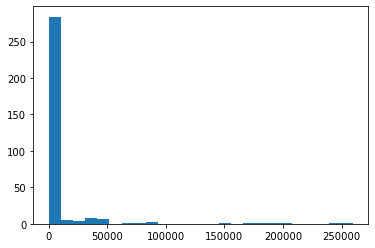

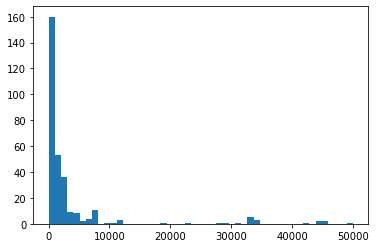

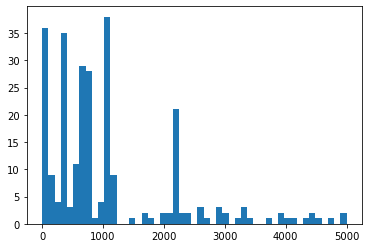

In [30]:
cnts = info.groupby('cell_mfc_name').count()['sample_id'].sort_values()

plt.figure()
plt.hist(cnts, bins=25)
plt.show()

plt.figure()
plt.hist(cnts, bins=np.linspace(0,50000,50))
plt.show()

plt.figure()
plt.hist(cnts, bins=np.linspace(0,5000,50))
plt.show()

In [31]:
# how many cell lines have fewer than 1000 perturbation profiles?
print('# of cell lines with fewer than 1000 profiles:', (cnts < 1000).sum())
print('# of cell lines with more  than 1000 profiles:', (cnts > 1000).sum())

# of cell lines with fewer than 1000 profiles: 160
# of cell lines with more  than 1000 profiles: 158


# What time points have been measured (and how many)?

In [32]:
info.pert_time_unit.unique()

array(['h'], dtype=object)

In [33]:
info.pert_time.unique()

array([ 7.20e+01,  9.60e+01,  2.40e+01,  6.00e+00,  1.20e+02,  4.80e+01,
        1.92e+02,  3.00e+00,  1.00e+00, -6.66e+02,  2.00e+00,  2.88e+02,
        1.68e+02,  1.20e+01,  5.00e-01,  3.36e+02,  2.40e+02,  1.44e+02,
        2.00e+01,  3.00e+01,  4.00e+00,  4.08e+02,  0.00e+00])

In [34]:
info.groupby('pert_time').count()['sample_id'].sort_values()

pert_time
 0.5           21
 240.0         23
 288.0         24
 336.0         24
 0.0           46
 30.0         275
 20.0         275
 192.0        357
 1.0          398
-666.0        655
 408.0        699
 12.0        1158
 2.0         1497
 168.0       1513
 72.0        5389
 4.0        13541
 48.0       21397
 3.0        34051
 144.0      40892
 120.0      69013
 6.0       420690
 96.0      837052
 24.0     1420510
Name: sample_id, dtype: int64

C:\Users\natha\miniconda3\envs\gcnvae\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


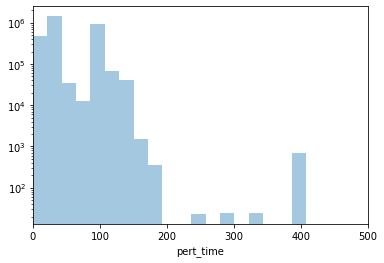

In [45]:
plt.figure()
sbn.distplot(info.pert_time, kde=False)
plt.xlim(0,500)
plt.yscale('log')
plt.show()

# How many observations of each treatment `type` 

e.g., overexpression, shRNA, crispr, drug treated, etc 

In [40]:
info.groupby('pert_type').count()['sample_id'].sort_values()

pert_type
ctl_x               12
ctl_untrt        32540
ctl_vector       59347
ctl_vehicle     102696
trt_oe          131668
trt_xpr         414816
trt_sh          454191
trt_cp         1805898
Name: sample_id, dtype: int64

# How many unique compounds and genetic perturbations are there? 

e.g., how large would the perturbation-perturbation graph be? 

In [47]:
info.head()

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,cell_mfc_name,pert_mfc_id,det_plate,det_well,rna_plate,rna_well,count_mean,count_cv,qc_f_logp,qc_iqr,qc_slope,pert_id,sample_id,pert_type,cell_iname,qc_pass,dyn_range,inv_level_10,build_name,failure_mode,project_code,cmap_name
0,b11,NaN,20.00,uL,20 uL,72.0,72 h,h,VCAP,ERG_11,ERG013_VCAP_72H_X3_B11,O14,ERG013_VCAP_72H_X3,O14,59,18,7.3,11.74,66,ERG_11,ERG013_VCAP_72H_X3_B11:O14,trt_sh,VCAP,0.0,4.20788,4220.5,NaN,dyn_range,ERG,ERG
1,b10,NaN,1.00,uL,1 uL,96.0,96 h,h,U2OS,TRCN0000072237,TAK004_U2OS_96H_X2_B10_DUO52HI53LO,D10,TAK004_U2OS_96H_X1,D10,67,18,5.7,14.98,67,TRCN0000072237,TAK004_U2OS_96H_X2_B10_DUO52HI53LO:D10,ctl_vector,U2OS,0.0,4.73906,1462.0,NaN,inv_level_10,TAK,LACZ
3,b12,NaN,150.00,ng,150 ng,48.0,48 h,h,HEK293T,ENTRY00543,HSF038_HEK293T_48H_X2_B12,M01,HSF038_HEK293T_48H_X2,M01,75,15,5.9,9.25,59,ENTRY00543,HSF038_HEK293T_48H_X2_B12:M01,trt_oe,HEK293T,0.0,23.79710,1642.0,NaN,inv_level_10,HSF,PDGFRA
4,f3b5,6.66,5.33,uM,6.66 uM,24.0,24 h,h,A375,BRD-K79781870,DOS043_A375_24H_X1_F3B5_DUO52HI53LO,D17,DOS043_A375_24H_X1,D17,58,26,6.3,15.87,68,BRD-K79781870,DOS043_A375_24H_X1_F3B5_DUO52HI53LO:D17,trt_cp,A375,0.0,6.78867,1558.0,NaN,"inv_level_10,qc_iqr",DOS,BRD-K79781870
5,b11,NaN,1.00,uL,1 uL,72.0,72 h,h,PC3,TRCN0000013914,ERG013_PC3_72H_X1_B11,D16,ERG013_PC3_72H_X1,D16,62,17,7.9,10.00,64,TRCN0000013914,ERG013_PC3_72H_X1_B11:D16,trt_sh,PC3,1.0,5.87049,3581.0,NaN,NaN,ERG,ERG


In [77]:
# total # of unique perturbation
all_unq_perts = info.cmap_name.unique()
all_unq_perts.shape[0]

42987

In [78]:
# how many unique compounds ? 
unq_cps = info[lambda x: x.pert_type == 'trt_cp'].cmap_name.unique() 
unq_cps.shape[0]

33609

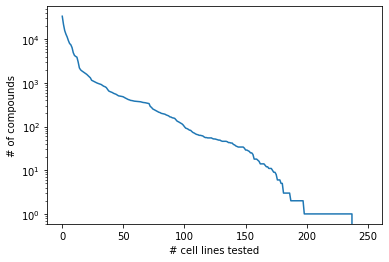

# of compounds with at least 50 cell lines tested: 479
# of compounds with at least 25 cell lines tested: 1112
# of compounds with at least 10 cell lines tested: 4248
# of compounds with at least 5 cell lines tested: 9321
total # of compounds: 33609


In [89]:
# how many unique compounds with more than x profiles? 
cp_cnt = info[lambda x: x.pert_type == 'trt_cp'][['cmap_name', 'cell_mfc_name']].drop_duplicates().groupby('cmap_name')['cell_mfc_name'].count() 

cnt_t = list(range(0,250,1))
ncmps = [cp_cnt[cp_cnt > t].shape[0] for t in cnt_t] 

plt.figure()
plt.plot(cnt_t, ncmps)
plt.yscale('log')
plt.xlabel('# cell lines tested'); plt.ylabel('# of compounds')
plt.show()

print('# of compounds with at least 50 cell lines tested:', cp_cnt[cp_cnt > 50].shape[0])
print('# of compounds with at least 25 cell lines tested:', cp_cnt[cp_cnt > 25].shape[0])
print('# of compounds with at least 10 cell lines tested:', cp_cnt[cp_cnt > 10].shape[0])
print('# of compounds with at least 5 cell lines tested:', cp_cnt[cp_cnt > 5].shape[0])
print('total # of compounds:', cp_cnt[cp_cnt > 0].shape[0])

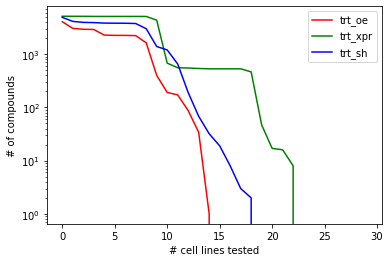

In [93]:
# how many oe/xpr/sh are measured in N cell types ? 
def plot_(feat, ax, c): 

    _cnt = info[lambda x: x.pert_type == feat][['cmap_name', 'cell_mfc_name']].drop_duplicates().groupby('cmap_name')['cell_mfc_name'].count() 
    _cnt_t = list(range(0,30,1))
    _ncmps = [_cnt[_cnt > t].shape[0] for t in _cnt_t] 
    ax.plot(_cnt_t, _ncmps, label=feat, c=c)

f,ax = plt.subplots(1,1)
_ = [plot_(f, ax, c) for f,c in zip(['trt_oe', 'trt_xpr', 'trt_sh'], ['r','g','b'])]
plt.yscale('log')
plt.xlabel('# cell lines tested'); plt.ylabel('# of genetic perturbations')
plt.legend()
plt.show()

In [76]:
unq_cdna = set(info[lambda x: x.pert_type == 'trt_oe'].cmap_name.unique().tolist())
unq_xpr = set(info[lambda x: x.pert_type == 'trt_xpr'].cmap_name.unique().tolist())
unq_shrna = set(info[lambda x: x.pert_type == 'trt_sh'].cmap_name.unique().tolist())

# how many genes are both targeted using crispr, shRNA and OE
xpr_sh = unq_shrna.intersection(unq_xpr)
xpr_cdna = unq_xpr.intersection(unq_cdna)
cdna_sh = unq_cdna.intersection(unq_shrna)

print('# of unqiue shRNA targets:\t\t', len(unq_shrna))
print('# of unqiue cDNA targets:\t\t', len(unq_cdna))
print('# of unique crsipr targets:\t\t', len(unq_xpr))
print()
print('overlap of targets [crispr, shRNA]\t', len(xpr_sh))
print('overlap of targets [crispr, cDNA]\t', len(xpr_cdna))
print('overlap of targets [cDNA, shRNA]\t', len(cdna_sh))

# of unqiue shRNA targets:		 4917
# of unqiue cDNA targets:		 4071
# of unique crsipr targets:		 5158

overlap of targets [crispr, shRNA]	 2099
overlap of targets [crispr, cDNA]	 1391
overlap of targets [cDNA, shRNA]	 2584


In [4]:
# cell info 

In [5]:
cellinfo.head()

,cell_iname,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,cell_type,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
0,1HAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,Unknown,Unknown,Unknown,unknown,unknown,normal fibroblast sample,NaN,unknown,NaN,NaN
1,AALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,Unknown,Unknown,Unknown,unknown,unknown,normal epithelium sample,NaN,unknown,NaN,NaN
2,AG06263_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN
3,AG06840_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN
4,AG078N1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN


In [6]:
cellinfo.shape

(240, 20)

In [7]:
cellinfo[lambda x: ~x.ccle_name.isna()]

,cell_iname,cellosaurus_id,donor_age,donor_age_death,donor_disease_age_onset,doubling_time,growth_medium,provider_catalog_id,feature_id,cell_type,donor_ethnicity,donor_sex,donor_tumor_phase,cell_lineage,primary_disease,subtype,provider_name,growth_pattern,ccle_name,cell_alias
85,OCILY10,CVCL_8795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,F,Unknown,placenta,lymphoma,b-cell lymphoma,NaN,unknown,OCILY10_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Ly10|OCI-LY-10
87,TC32,CVCL_7151,NaN,NaN,NaN,24,NaN,NaN,NaN,tumor,Unknown,F,Unknown,bone,bone cancer,ewing's sarcoma,NaN,adherent,TC32_BONE,TC-32
90,HCC515,CVCL_5136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,F,Unknown,lung,lung cancer,carcinoma,NaN,adherent,HCC515_LUNG,HCC0515
91,SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tumor,Unknown,Unknown,Unknown,lung,lung cancer,lung cancer,NaN,unknown,SALE_LUNG,NaN
92,SHSY5Y,CVCL_0019,NaN,NaN,NaN,55,1:1 mixture of ATCC-formulated Eagle's Minimum...,CRL-2266,NaN,tumor,Unknown,F,Metastatic,autonomic_ganglia,neuroblastoma,neuroblastoma,NaN,mix,SHSY5Y_AUTONOMIC_GANGLIA,SH-SY5Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,RCC10RGB,CVCL_1647,NaN,NaN,NaN,108,DMEM+ 1%FBS,NaN,c-526,tumor,Unknown,M,Unknown,kidney,kidney cancer,carcinoma,RIKEN,adherent,RCC10RGB_KIDNEY,10RGB
236,OVK18,CVCL_3770,NaN,NaN,NaN,36,MEM + 1% FBS,NaN,c-148,tumor,Unknown,F,Unknown,ovary,ovarian cancer,carcinoma,RIKEN,adherent,OVK18_OVARY,OVK-18
237,JHUEM2,CVCL_4656,NaN,NaN,NaN,48,DMEM/F12 (Hyclone Cat.# SH323.1),NaN,c-187,tumor,Unknown,F,Primary,endometrium,endometrial cancer,carcinoma,RIKEN,adherent,JHUEM2_ENDOMETRIUM,JHUEM-2
238,OVCAR8,CVCL_1629,NaN,NaN,NaN,60,RPMI-164 ATCC catalog # 3-21,NaN,c-349,tumor,Unknown,F,Primary,ovary,ovarian cancer,carcinoma,NCI/DCTD,adherent,OVCAR8_OVARY,OVCAR-8|NIH:OVCAR-8
